<a href="https://colab.research.google.com/github/Storkluc/Python/blob/master/Trabalho_final_parte_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho integrado Ciência de dados e Python 02

###Importação de bibliotecas

In [47]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10,8]
sns.set_style("darkgrid")


from google.colab import files

###Importando e checando a Base

In [48]:
uploaded = files.upload()

Saving Churn_Modelling2.csv to Churn_Modelling2 (2).csv


In [57]:
# Carregando arquivo em dataset genérico.
df = pd.read_csv(io.BytesIO(uploaded['Churn_Modelling2.csv']), sep=';', encoding='latin1')

In [58]:

df_mediamediana = df

In [51]:
df_mediamediana.head(20)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619.0,France,Female,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0
1,15647311,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,15619304,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,15701354,699.0,France,Female,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0.0
4,15737888,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0
5,15574012,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0
6,15592531,822.0,France,Male,50.0,7.0,NaN,2.0,1.0,1.0,10062.80,0.0
7,15656148,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0
8,15792365,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0.0
9,15592389,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0.0


In [52]:
# Dados Faltantes na base original.
df.isnull().sum()

CustomerId            0
CreditScore        1000
Geography          1000
Gender             1000
Age                1000
Tenure             1000
Balance            1000
NumOfProducts      1000
HasCrCard          1000
IsActiveMember     1000
EstimatedSalary    1001
Exited             1000
dtype: int64

#Manipulação de dados faltantes

###Método 01 - Imputação pela média ou mediana

In [69]:
# Filtrando os atributos númericos.
df_mediamediana = df_mediamediana[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
df_mediamediana.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [70]:
# Média de dados faltantes.
df_mediamediana.isnull().mean()

CreditScore        0.1000
Age                0.1000
Tenure             0.1000
Balance            0.1000
NumOfProducts      0.1000
HasCrCard          0.1000
IsActiveMember     0.1000
EstimatedSalary    0.1001
Exited             0.1000
dtype: float64

In [71]:
# Tratando os valores fantantes:

# Calculando a mediana dos atributos.
median_CreditScore = df_mediamediana.CreditScore.median()
median_Age = df_mediamediana.Age.median()
median_Tenure = df_mediamediana.Tenure.median()
median_Balance = df_mediamediana.Balance.median()
median_NumOfProducts = df_mediamediana.NumOfProducts.median()
median_HasCrCard = df_mediamediana.HasCrCard.median()
median_IsActiveMember = df_mediamediana.IsActiveMember.median()
median_EstimatedSalary = df_mediamediana.EstimatedSalary.median()
median_Exited = df_mediamediana.Exited.median()

print('Mediana CreditScore:', median_CreditScore)
print('Mediana Age:', median_Age)
print('Mediana Tenure:', median_Tenure)
print('Mediana Balance:', median_Balance)
print('Mediana NumOfProducts:', median_NumOfProducts)
print('Mediana HasCrdCard:', median_HasCrCard)
print('Mediana IsActiveMember:', median_IsActiveMember)
print('Mediana EstimatedSalary:', median_EstimatedSalary)
print('Mediana Exited:', median_Exited,'\n')

# Calculando a média dos valores faltantes.
mean_CreditScore = df_mediamediana.CreditScore.mean()
mean_Age = df_mediamediana.Age.mean()
mean_Tenure = df_mediamediana.Tenure.mean()
mean_Balance = df_mediamediana.Balance.mean()
mean_NumOfProducts = df_mediamediana.NumOfProducts.mean()
mean_HasCrdCard = df_mediamediana.HasCrCard.mean()
mean_IsActiveMember = df_mediamediana.IsActiveMember.mean()
mean_EstimatedSalary = df_mediamediana.EstimatedSalary.mean()
mean_Exited = df_mediamediana.Exited.mean()

print('Média CreditScore:', mean_CreditScore)
print('Média Age:', mean_Age)
print('Média Tenure:', mean_Tenure)
print('Média Balance:', mean_Balance)
print('Média NumOfProducts:', mean_NumOfProducts)
print('Média HasCrdCard:,', mean_HasCrdCard)
print('Média IsActiveMember:', mean_IsActiveMember)
print('Média EstimatedSalary:', mean_EstimatedSalary)
print('Média Exited:' ,mean_Exited)

Mediana CreditScore: 651.0
Mediana Age: 37.0
Mediana Tenure: 5.0
Mediana Balance: 104147.655
Mediana NumOfProducts: 1.0
Mediana HasCrdCard: 1.0
Mediana IsActiveMember: 1.0
Mediana EstimatedSalary: 100240.2
Mediana Exited: 0.0 

Média CreditScore: 650.2931111111111
Média Age: 38.88455555555556
Média Tenure: 5.015444444444444
Média Balance: 84984.32143111067
Média NumOfProducts: 1.529111111111111
Média HasCrdCard:, 0.7058888888888889
Média IsActiveMember: 0.5158888888888888
Média EstimatedSalary: 100152.37216246207
Média Exited: 0.2041111111111111


In [73]:
# Inserindo as colunas com a mediana e a media dos valores faltantes.
df_mediamediana.loc[:, 'median_CreditScore'] = df_mediamediana.CreditScore.fillna(median_CreditScore)
df_mediamediana.loc[:, 'mean_CreditScore'] = df_mediamediana.CreditScore.fillna(mean_CreditScore)

df_mediamediana.loc[:, 'median_Age'] = df_mediamediana.Age.fillna(median_Age)
df_mediamediana.loc[:, 'mean_Age'] = df_mediamediana.Age.fillna(mean_Age)

df_mediamediana.loc[:, 'median_Tenure'] = df_mediamediana.Tenure.fillna(median_Tenure)
df_mediamediana.loc[:, 'mean_Tenure'] = df_mediamediana.Tenure.fillna(mean_Tenure)

df_mediamediana.loc[:, 'median_Balance'] = df_mediamediana.Balance.fillna(median_Balance)
df_mediamediana.loc[:, 'mean_Balance'] = df_mediamediana.Balance.fillna(mean_Balance)

df_mediamediana.loc[:, 'median_NumOfProducts'] = df_mediamediana.NumOfProducts.fillna(median_NumOfProducts)
df_mediamediana.loc[:, 'mean_NumOfProducts'] = df_mediamediana.NumOfProducts.fillna(mean_NumOfProducts)

df_mediamediana.loc[:, 'median_HasCrCard'] = df_mediamediana.HasCrCard.fillna(median_HasCrCard)
df_mediamediana.loc[:, 'mean_HasCrCard'] = df_mediamediana.HasCrCard.fillna(mean_HasCrdCard)

df_mediamediana.loc[:, 'median_IsActiveMember'] = df_mediamediana.IsActiveMember.fillna(median_IsActiveMember)
df_mediamediana.loc[:, 'mean_IsActiveMember'] = df_mediamediana.IsActiveMember.fillna(mean_IsActiveMember)

df_mediamediana.loc[:, 'mediana_EstimatedSalary'] = df_mediamediana.EstimatedSalary.fillna(median_EstimatedSalary)
df_mediamediana.loc[:, 'mean_EstimatedSalary'] = df_mediamediana.EstimatedSalary.fillna(mean_EstimatedSalary)

df_mediamediana.loc[:, 'median_Exited'] = df_mediamediana.Exited.fillna(median_Exited)
df_mediamediana.loc[:, 'mean_Exited'] = df_mediamediana.Exited.fillna(mean_Exited)
df_mediamediana.head(20) 

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,median_CreditScore,mean_CreditScore,median_Age,mean_Age,median_Tenure,mean_Tenure,median_Balance,mean_Balance,median_NumOfProducts,mean_NumOfProducts,median_HasCrCard,mean_HasCrCard,median_IsActiveMember,mean_IsActiveMember,mediana_EstimatedSalary,mean_EstimatedSalary,median_Exited,mean_Exited
0,619.0,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0,619.0,619.0,42.0,42.0,2.0,2.0,104147.655,84984.321431,1.0,1.0,1.0,1.0,1.0,1.0,101348.88,101348.88,1.0,1.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,608.0,608.0,41.0,41.0,1.0,1.0,83807.860,83807.860000,1.0,1.0,0.0,0.0,1.0,1.0,112542.58,112542.58,0.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,502.0,502.0,42.0,42.0,8.0,8.0,159660.800,159660.800000,3.0,3.0,1.0,1.0,0.0,0.0,113931.57,113931.57,1.0,1.0
3,699.0,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0.0,699.0,699.0,39.0,39.0,1.0,1.0,104147.655,84984.321431,2.0,2.0,0.0,0.0,0.0,0.0,93826.63,93826.63,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,850.0,850.0,43.0,43.0,2.0,2.0,125510.820,125510.820000,1.0,1.0,1.0,1.0,1.0,1.0,79084.10,79084.10,0.0,0.0
5,645.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0,645.0,645.0,44.0,44.0,8.0,8.0,113755.780,113755.780000,2.0,2.0,1.0,1.0,0.0,0.0,149756.71,149756.71,1.0,1.0
6,822.0,50.0,7.0,NaN,2.0,1.0,1.0,10062.80,0.0,822.0,822.0,50.0,50.0,7.0,7.0,104147.655,84984.321431,2.0,2.0,1.0,1.0,1.0,1.0,10062.80,10062.80,0.0,0.0
7,376.0,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0,376.0,376.0,29.0,29.0,4.0,4.0,115046.740,115046.740000,4.0,4.0,1.0,1.0,0.0,0.0,119346.88,119346.88,1.0,1.0
8,501.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0.0,501.0,501.0,44.0,44.0,4.0,4.0,142051.070,142051.070000,2.0,2.0,0.0,0.0,1.0,1.0,74940.50,74940.50,0.0,0.0
9,684.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0.0,684.0,684.0,27.0,27.0,2.0,2.0,134603.880,134603.880000,1.0,1.0,1.0,1.0,1.0,1.0,71725.73,71725.73,0.0,0.0


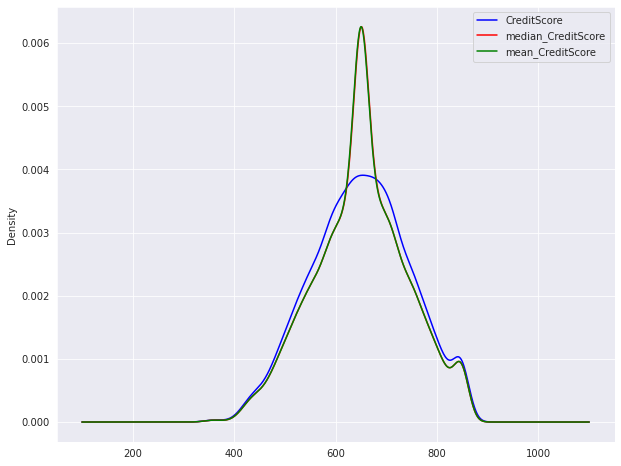

In [61]:
# Desidade dos dados do atributo CreditScore.
fig = plt.figure()
ax = fig.add_subplot(111)

df_mediamediana['CreditScore'].plot(kind='kde', ax=ax, color='blue')
df_mediamediana['median_CreditScore'].plot(kind='kde', ax=ax, color='red')
df_mediamediana['mean_CreditScore'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

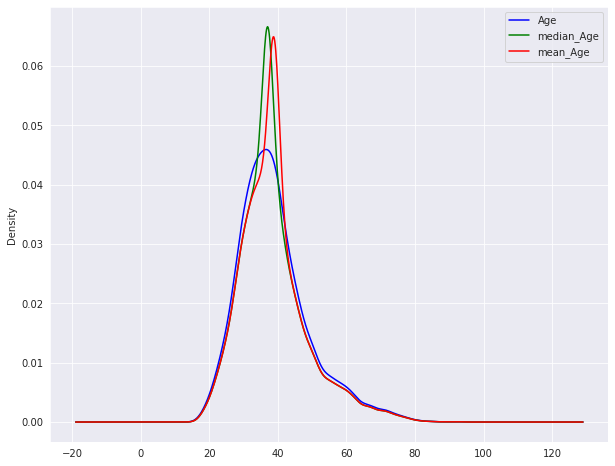

In [62]:
# Desidade dos dados do atributo Age.
fig = plt.figure()
ax = fig.add_subplot(111)

df_mediamediana['Age'].plot(kind='kde', ax=ax, color='blue')
df_mediamediana['median_Age'].plot(kind='kde', ax=ax, color='green')
df_mediamediana['mean_Age'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

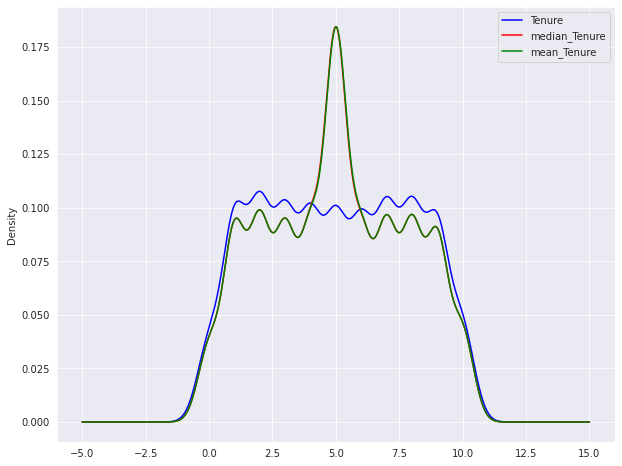

In [63]:
# Desidade dos dados do atributo Tenure.
fig = plt.figure()
ax = fig.add_subplot(111)

df_mediamediana['Tenure'].plot(kind='kde', ax=ax, color='blue')
df_mediamediana['median_Tenure'].plot(kind='kde', ax=ax, color='red')
df_mediamediana['mean_Tenure'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

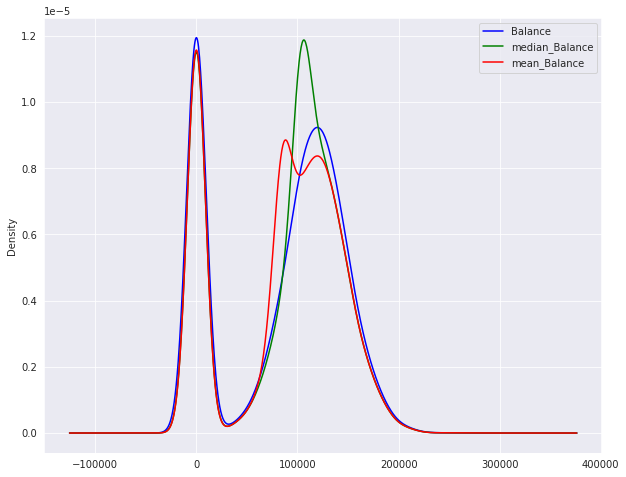

In [64]:
# Desidade dos dados do atributo Balance.
fig = plt.figure()
ax = fig.add_subplot(111)

df_mediamediana['Balance'].plot(kind='kde', ax=ax, color='blue')
df_mediamediana['median_Balance'].plot(kind='kde', ax=ax, color='green')
df_mediamediana['mean_Balance'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

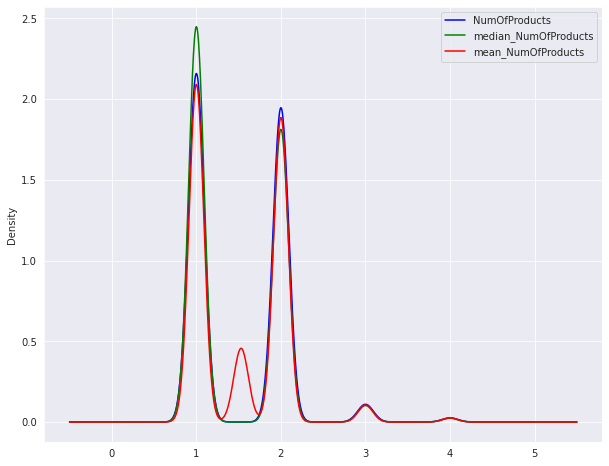

In [74]:
# Desidade dos dados do atributo NumOfProducts.
fig = plt.figure()
ax = fig.add_subplot(111)

df_mediamediana['NumOfProducts'].plot(kind='kde', ax=ax, color='blue')
df_mediamediana['median_NumOfProducts'].plot(kind='kde', ax=ax, color='green')
df_mediamediana['mean_NumOfProducts'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

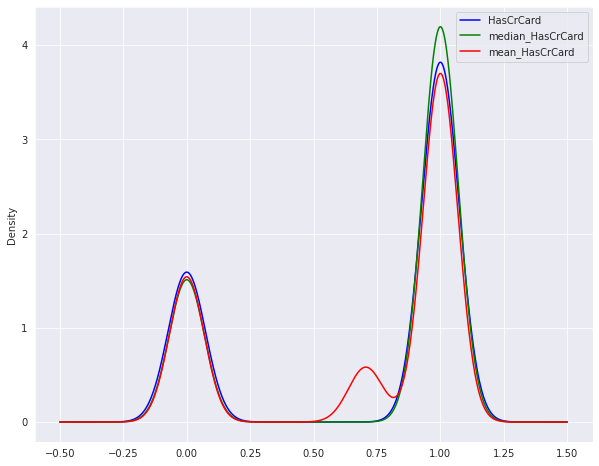

In [77]:
# Desidade dos dados do atributo HasCrCard.
fig = plt.figure()
ax = fig.add_subplot(111)

df_mediamediana['HasCrCard'].plot(kind='kde', ax=ax, color='blue')
df_mediamediana['median_HasCrCard'].plot(kind='kde', ax=ax, color='green')
df_mediamediana['mean_HasCrCard'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

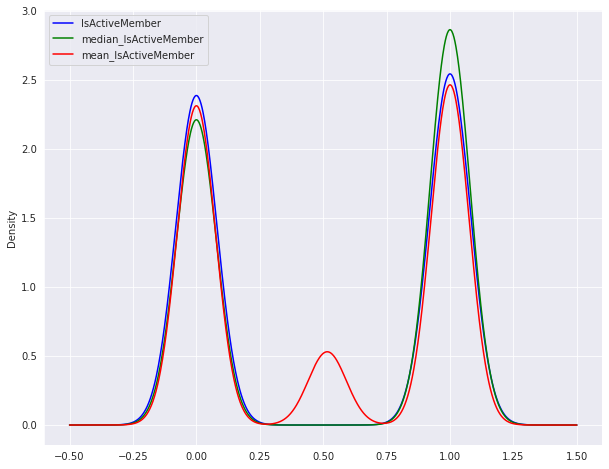

In [65]:
# Desidade dos dados do atributo IsActiveMember.
fig = plt.figure()
ax = fig.add_subplot(111)

df_mediamediana['IsActiveMember'].plot(kind='kde', ax=ax, color='blue')
df_mediamediana['median_IsActiveMember'].plot(kind='kde', ax=ax, color='green')
df_mediamediana['mean_IsActiveMember'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

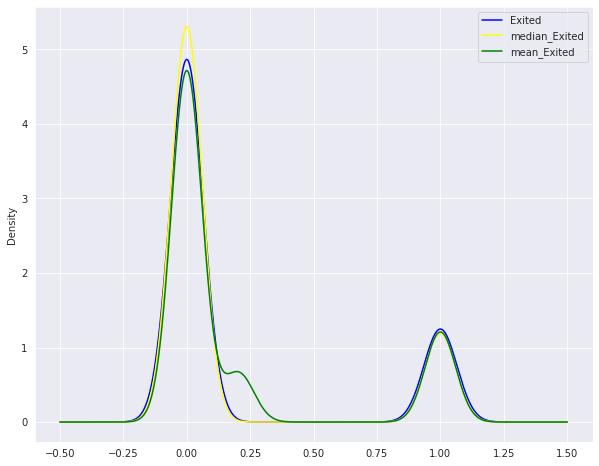

In [66]:
# Desidade dos dados do atributo Exited
fig = plt.figure()
ax = fig.add_subplot(111)

df_mediamediana['Exited'].plot(kind='kde', ax=ax, color='blue')
df_mediamediana['median_Exited'].plot(kind='kde', ax=ax, color='yellow')
df_mediamediana['mean_Exited'].plot(kind='kde', ax=ax, color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')

In [78]:
# Estatísticas da nova base.
df_mediamediana.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,median_CreditScore,mean_CreditScore,median_Age,mean_Age,median_Tenure,mean_Tenure,median_Balance,mean_Balance,median_NumOfProducts,mean_NumOfProducts,median_HasCrCard,mean_HasCrCard,median_IsActiveMember,mean_IsActiveMember,mediana_EstimatedSalary,mean_EstimatedSalary,median_Exited,mean_Exited
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,8999.000000,9000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.293111,38.884556,5.015444,84984.321431,1.529111,0.705889,0.515889,100152.372162,0.204111,650.363800,650.293111,38.696100,38.884556,5.013900,5.015444,86900.654788,84984.321431,1.476200,1.529111,0.735300,0.705889,0.564300,0.515889,100161.163729,100152.372162,0.183700,0.204111
std,96.823323,10.504779,2.897456,60031.446110,0.581063,0.455667,0.499775,57485.666100,0.403073,91.854404,91.854159,9.981679,9.965653,2.748757,2.748753,57239.980221,56950.513856,0.573643,0.551242,0.441195,0.432282,0.495873,0.474126,54532.364506,54532.358134,0.387259,0.382386
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,350.000000,350.000000,18.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.580000,11.580000,0.000000,0.000000
25%,583.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51352.025000,0.000000,592.000000,592.000000,32.000000,32.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56641.297500,56641.297500,0.000000,0.000000
50%,651.000000,37.000000,5.000000,104147.655000,1.000000,1.000000,1.000000,100240.200000,0.000000,651.000000,650.293111,37.000000,38.000000,5.000000,5.015444,104147.655000,97198.540000,1.000000,1.529111,1.000000,1.000000,1.000000,0.515889,100240.200000,100152.372162,0.000000,0.000000
75%,717.000000,44.000000,8.000000,130422.345000,2.000000,1.000000,1.000000,149438.110000,0.000000,709.000000,709.000000,43.000000,43.000000,7.000000,7.000000,127644.240000,127644.240000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,143776.365000,143776.365000,0.000000,0.204111
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,850.000000,850.000000,92.000000,92.000000,10.000000,10.000000,250898.090000,250898.090000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,199992.480000,199992.480000,1.000000,1.000000


###Método 02 - Imputação usando o final da distribuíção

In [68]:
df_final = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
df_final.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619.0,42.0,2.0,NaN,1.0,1.0,1.0,101348.88,1.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0
3,699.0,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0


In [ ]:
# Média dos valores faltantes dos atributos
df_final.isnull().mean()

CreditScore    0.1139
Age            0.0035
Tenure         0.0005
Exited         0.0222
dtype: float64

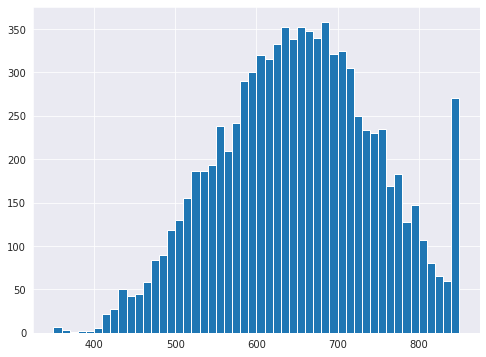

In [ ]:
# Distribuição do atributo CreditScore
df_final.CreditScore.hist(bins=50)

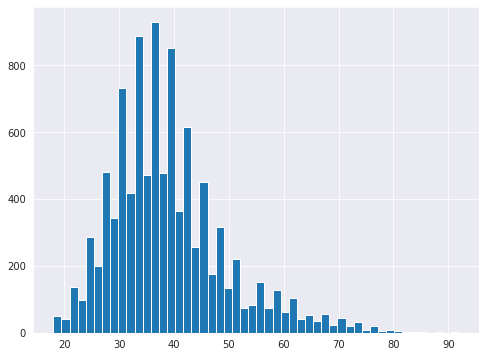

In [ ]:
# Distribuição do atributo Age
df_final.Age.hist(bins=50)

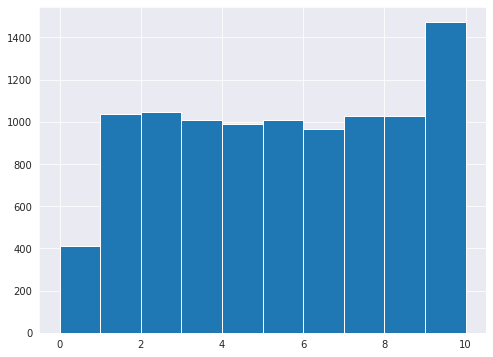

In [ ]:
# Distribuição do atributo Tenure
df_final.Tenure.hist(bins=10)

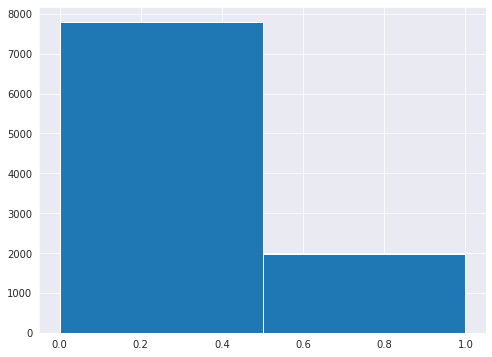

In [ ]:
# Distribuição do atributo Exited
df_final.Exited.hist(bins=2)

In [ ]:
# Utilizando o valor da média + 3 * O valor do desvio padrão, para identificar
# o valor que será utilizado para preencher os espaços NaN.
eod_value_score = df_final.CreditScore.mean() + 3 * df_final.CreditScore.std()
eod_value_frete = df_final.Age.mean() + 3 * df_final.Age.std()
eod_Tenure = df_final.Tenure.mean() + 3 * df_final.Tenure.std()
eod_Exited = df_final.Exited.mean() + 3 * df_final.Exited.std()

print('CreditScore:',eod_value_score)
print('Age:', eod_value_frete)
print('Tenure:', eod_Tenure)
print('Exited:', eod_Exited)

CreditScore: 940.8280440862262
Age: 70.41008972455697
Tenure: 13.688643963232522
Exited: 1.4107668798169761


In [ ]:
# Substituindo os valores faltantes.
df_final['eod_value_score'] = df_final.CreditScore.fillna(eod_value_score)
df_final['eod_value_frete'] = df_final.Age.fillna(eod_value_frete)
df_final['eod_Tenure'] = df_final.Tenure.fillna(eod_Tenure)
df_final['eod_Exited'] = df_final.Exited.fillna(eod_Exited)

df_final.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,CreditScore,Age,Tenure,Exited,eod_value_score,eod_value_frete,eod_Tenure,eod_Exited
0,619.0,42.0,2.0,1.0,619.000000,42.0,2.0,1.0
1,608.0,41.0,1.0,0.0,608.000000,41.0,1.0,0.0
2,NaN,42.0,8.0,1.0,940.828044,42.0,8.0,1.0
3,NaN,39.0,1.0,0.0,940.828044,39.0,1.0,0.0
4,NaN,43.0,2.0,0.0,940.828044,43.0,2.0,0.0
5,NaN,44.0,8.0,1.0,940.828044,44.0,8.0,1.0
6,NaN,50.0,7.0,0.0,940.828044,50.0,7.0,0.0
7,NaN,29.0,4.0,1.0,940.828044,29.0,4.0,1.0
8,NaN,44.0,4.0,0.0,940.828044,44.0,4.0,0.0
9,NaN,27.0,2.0,0.0,940.828044,27.0,2.0,0.0


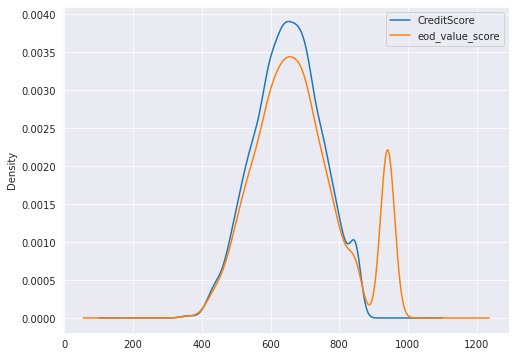

In [ ]:
# Gráfico de densidade apresenta a variação que houve no atributo CreditScore.
fig = plt.figure()
ax = fig.add_subplot(111)

df_final['CreditScore'].plot(kind='kde', ax=ax)
df_final['eod_value_score'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

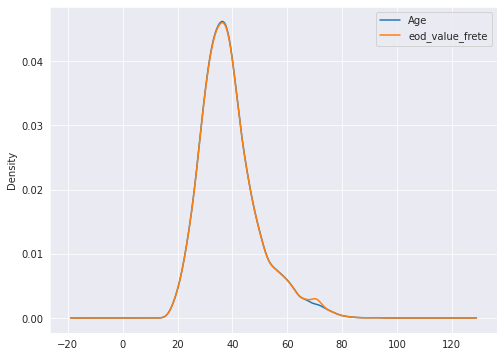

In [ ]:
# Gráfico de densidade apresenta a variação que houve no atributo Age.
fig = plt.figure()
ax = fig.add_subplot(111)

df_final['Age'].plot(kind='kde', ax=ax)
df_final['eod_value_frete'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

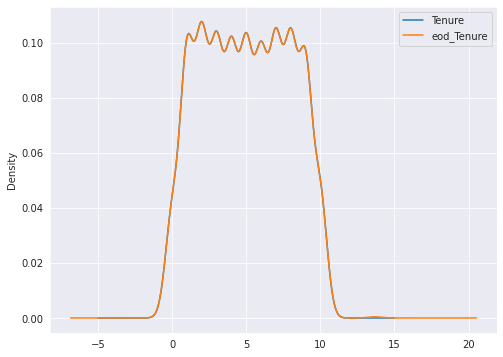

In [ ]:
# Gráfico de densidade apresenta a variação que houve no atributo Tenure.
fig = plt.figure()
ax = fig.add_subplot(111)

df_final['Tenure'].plot(kind='kde', ax=ax)
df_final['eod_Tenure'].plot(kind='kde', ax=ax)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
# Estatísticas após o preenchimento dos dados faltantes.
df_final.describe()

,CreditScore,Age,Tenure,Exited,eod_value_score,eod_value_frete,eod_Tenure,eod_Exited
count,8861.000000,9965.000000,9995.000000,9778.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.613588,38.929052,5.011806,0.203314,683.669014,39.039235,5.016144,0.230119
std,96.738152,10.493679,2.892279,0.402484,129.590154,10.639021,2.898055,0.435945
min,350.000000,18.000000,0.000000,0.000000,350.000000,18.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,593.000000,32.000000,3.000000,0.000000
50%,652.000000,37.000000,5.000000,0.000000,668.000000,37.000000,5.000000,0.000000
75%,717.000000,44.000000,7.000000,0.000000,753.000000,44.000000,8.000000,0.000000
max,850.000000,92.000000,10.000000,1.000000,940.828044,92.000000,13.688644,1.410767


###Manipulação de dados categóricos faltantes (MODA)

In [ ]:
df_moda = df

In [ ]:
df.head(3)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0
1,15647311,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0
2,15619304,NaN,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0


In [ ]:
df_moda = df_moda[['Geography','Gender']]
df_moda.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [ ]:
df_moda.isnull().mean()

Geography    0.0038
Gender       0.0058
dtype: float64

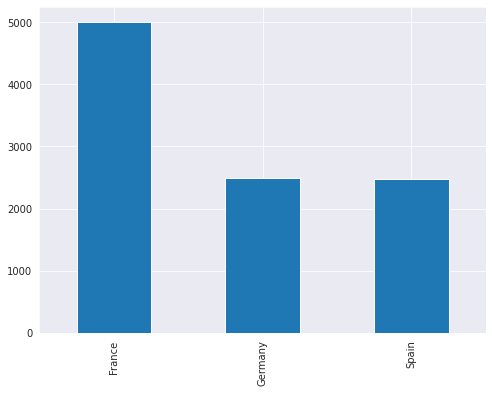

In [ ]:
df_moda.Geography.value_counts().sort_values(ascending=False).plot.bar()

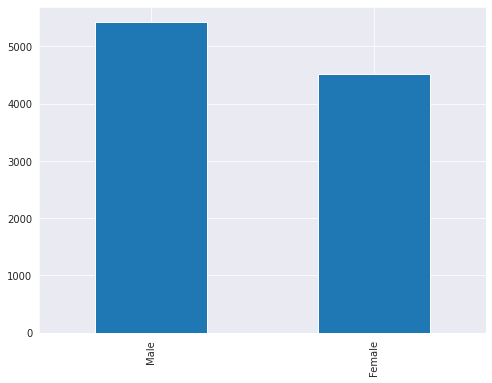

In [ ]:
df_moda.Gender.value_counts().sort_values(ascending=False).plot.bar()

In [ ]:
# Conferindo o valor que mais aparece com a MODA.
print(df_moda.Geography.mode(),'\n')
print(df_moda.Gender.mode(),'\n')

0    France
dtype: object 

0    Male
dtype: object 



In [ ]:
# Preenchendo os dados faltantes.
df_moda.Geography.fillna('France', inplace=True)
df_moda.Gender.fillna('Male', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
# Todos os valores foram substituídos.
df_moda.isnull().sum()

Geography    0
Gender       0
dtype: int64

##Detecção e manipulação de Outliers

###Método 01 - Eliminação de Outliers

In [ ]:
# Importando a base do início do código.
df_eraseoutliers = df[['CreditScore','Tenure','Age','Balance','Exited']]

In [ ]:
df_eraseoutliers.head()

,CreditScore,Tenure,Age,Balance,Exited
0,619.0,2.0,42.0,0.00,1.0
1,608.0,1.0,41.0,83807.86,0.0
2,NaN,8.0,42.0,159660.80,1.0
3,NaN,1.0,39.0,0.00,0.0
4,NaN,2.0,43.0,125510.82,0.0


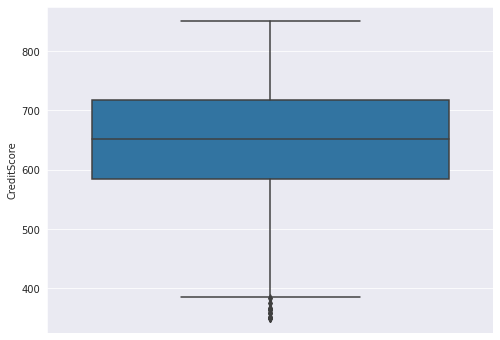

In [ ]:
# Gráfico de caixas para visualizar os outliers do atributo CreditScore.
sns.boxplot(y='CreditScore', data=df_eraseoutliers)

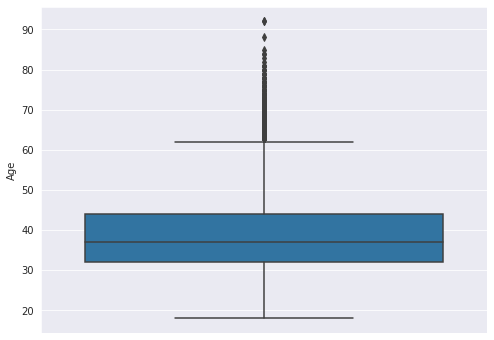

In [ ]:
# Gráfico de caixas para visualizar os outliers do atributo Age.
sns.boxplot(y='Age', data=df_eraseoutliers)

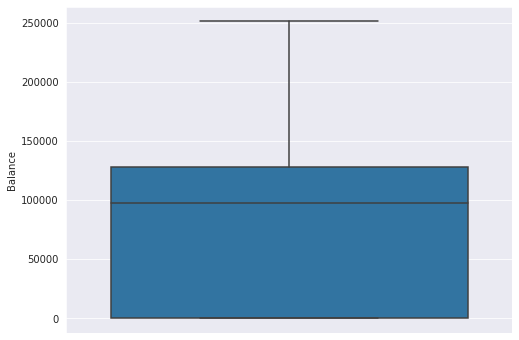

In [ ]:
# Gráfico de caixas para visualizar os outliers do atributo Exited.
sns.boxplot(y='Balance', data=df_eraseoutliers)

In [ ]:
# Identificando os outliers.

# Subtrai-se o terceiro quartil do atributo CreditScore do primeiro quartil, para o obter a faixa interquartil.
IQR_vp = df_eraseoutliers['CreditScore'].quantile(0.75) - df_eraseoutliers['CreditScore'].quantile(0.25)

lower_CreditScore_limit = df_eraseoutliers['CreditScore'].quantile(0.25) - (IQR_vp * 1.5)
upper_CreditScore_limit = df_eraseoutliers['CreditScore'].quantile(0.75) + (IQR_vp * 1.5)

print(lower_CreditScore_limit)
print(upper_CreditScore_limit)

384.5
916.5


In [ ]:
# Os valores inferiores a -45.92 e superiores a 147,34 são considerados outliers.

In [ ]:
# Identificando outliers para o atributo Age.
IQR_vf = df_eraseoutliers['Age'].quantile(0.75) - df_eraseoutliers['Age'].quantile(0.25)

lower_Age_limit = df_eraseoutliers['Age'].quantile(0.25) - (IQR_vf * 1.5)
upper_Age_limit = df_eraseoutliers['Age'].quantile(0.75) + (IQR_vf * 1.5)

print(lower_Age_limit)
print(upper_Age_limit)

14.0
62.0


In [ ]:
# Os valores inferiores a 2.60 e superiores a 22.31 são considerados outliers.

In [ ]:
# Aplicando a técnica no atributo Balance
IQR_tp = df_eraseoutliers['Exited'].quantile(0.75) - df_eraseoutliers['Exited'].quantile(0.25)

lower_Exited_limit = df_eraseoutliers['Exited'].quantile(0.25) - (IQR_tp * 1.5)
upper_Exited_limit = df_eraseoutliers['Exited'].quantile(0.75) + (IQR_tp * 1.5)

print(lower_Exited_limit)
print(upper_Exited_limit)

0.0
0.0


In [ ]:
# Os valores inferiores a -37.18 e superiores a 163.50 são considerados outliers.

In [ ]:
# Filtrando as instâncias com outliers.
CreditScore_outliers = np.where(df_eraseoutliers['CreditScore'] > upper_CreditScore_limit, True, np.where(df_eraseoutliers['CreditScore'] < lower_CreditScore_limit, True, False))

In [ ]:
Age_outliers = np.where(df_eraseoutliers['Age'] > upper_Age_limit, True, np.where(df_eraseoutliers['Age'] < lower_Age_limit, True, False))

In [ ]:
# Eliminando as instâncias que possuem outliers.
df_eraseoutliers_CreditScore_without_outliers = df_eraseoutliers.loc[~(CreditScore_outliers),]

In [ ]:
df_eraseoutliers_Age_without_outliers = df_eraseoutliers.loc[~(Age_outliers),]

In [ ]:
# Checando o tamanho da base sem outliers do atributo CreditScore.
df_eraseoutliers.shape, df_eraseoutliers_CreditScore_without_outliers.shape

((10000, 5), (9988, 5))

In [ ]:
# Checando o tamanho da base sem outliers do atributo Age.
df_eraseoutliers.shape, df_eraseoutliers_Age_without_outliers.shape

((10000, 5), (9642, 5))

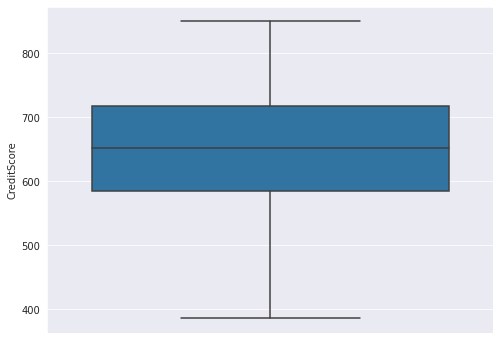

In [ ]:
# Gráfico confirmando a exclusão dos outliers do atributo CreditScore.
sns.boxplot(y='CreditScore', data=df_eraseoutliers_CreditScore_without_outliers)

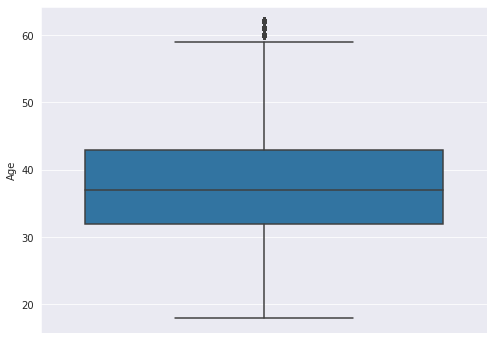

In [ ]:
sns.boxplot(y='Age', data=df_eraseoutliers_Age_without_outliers)

In [ ]:
# Estatísticas base CreditScore sem outliers.
df_eraseoutliers_CreditScore_without_outliers.describe()

,CreditScore,Tenure,Age,Balance,Exited
count,8849.000000,9983.000000,9953.000000,9988.000000,9766.000000
mean,651.007458,5.012020,38.920627,76461.530909,0.202335
std,96.209368,2.891973,10.491955,62396.903804,0.401761
min,386.000000,0.000000,18.000000,0.000000,0.000000
25%,584.000000,3.000000,32.000000,0.000000,0.000000
50%,652.000000,5.000000,37.000000,97173.290000,0.000000
75%,718.000000,7.000000,44.000000,127633.195000,0.000000
max,850.000000,10.000000,92.000000,250898.090000,1.000000


In [ ]:
# Estatísticas base Age sem outliers.
df_eraseoutliers_Age_without_outliers.describe()

,CreditScore,Tenure,Age,Balance,Exited
count,8545.000000,9637.000000,9607.000000,9642.000000,9435.000000
mean,650.472323,5.013905,37.797960,76552.732207,0.203392
std,96.769930,2.889126,8.808278,62403.333114,0.402543
min,350.000000,0.000000,18.000000,0.000000,0.000000
25%,583.000000,3.000000,32.000000,0.000000,0.000000
50%,652.000000,5.000000,37.000000,97302.205000,0.000000
75%,717.000000,7.000000,43.000000,127659.150000,0.000000
max,850.000000,10.000000,62.000000,250898.090000,1.000000


###Método 02 - Recorde de outliers usando IQR

In [ ]:
# Importando base.
df_eraseoutliersIQR = df[['CreditScore','Tenure','Age','Balance']]

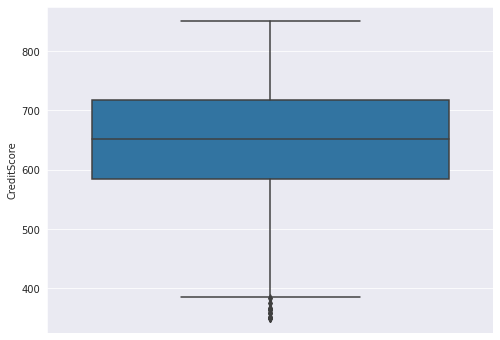

In [ ]:
# Plotando os outliers da base.
sns.boxplot(y='CreditScore', data=df_eraseoutliersIQR)

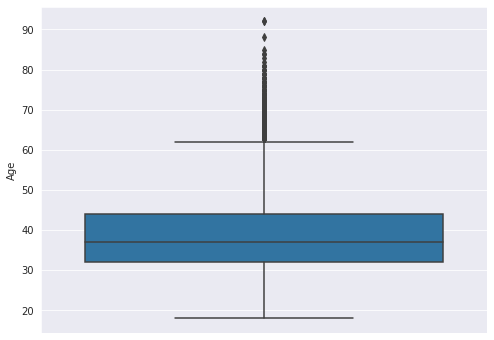

In [ ]:
sns.boxplot(y='Age', data=df_eraseoutliersIQR)

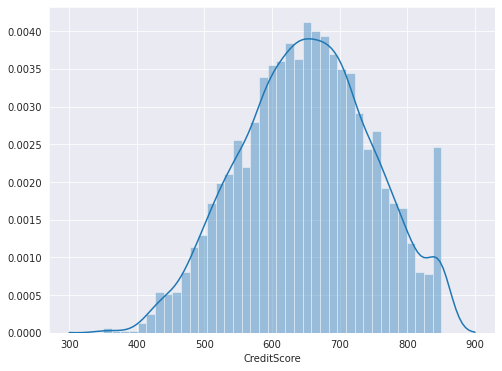

In [ ]:
# Distribuição das variáveis com outliers.
sns.distplot(df_eraseoutliersIQR['CreditScore'])

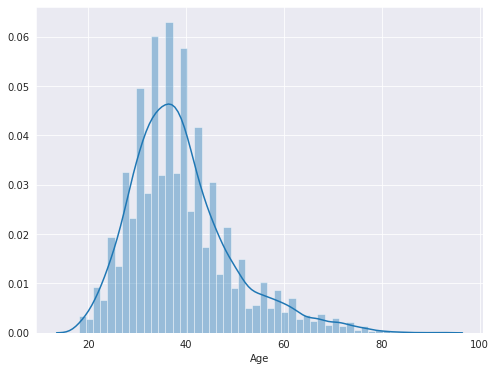

In [ ]:
sns.distplot(df_eraseoutliersIQR['Age'])

In [ ]:
# Utilizando os mesmos limites do método anterior, por se tratar da mesma base.
print(' Atributo CreditScore:\n','Inferior:',lower_CreditScore_limit)
print(' Superior:',upper_CreditScore_limit,'\n')
print(' Atibuto Age: \n','Inferior:', lower_Age_limit)
print(' Superior:', upper_Age_limit,'\n')

 Atributo CreditScore:
 Inferior: 384.5
 Superior: 916.5 

 Atibuto Age: 
 Inferior: 14.0
 Superior: 62.0 



In [ ]:
# Subistituindo os outliers maiores pelo limite superior e os menores pelo limite inferior.
df_eraseoutliersIQR['CreditScore'] = np.where(df_eraseoutliersIQR['CreditScore'] > upper_CreditScore_limit, upper_CreditScore_limit, np.where(df_eraseoutliersIQR['CreditScore'] < lower_CreditScore_limit, lower_CreditScore_limit, df_eraseoutliersIQR['CreditScore']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_eraseoutliersIQR.loc[:,('Age')] = np.where(df_eraseoutliersIQR['Age'] > upper_Age_limit, upper_Age_limit, np.where(df_eraseoutliersIQR['Age'] < lower_Age_limit, lower_Age_limit, df_eraseoutliersIQR['Age']))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


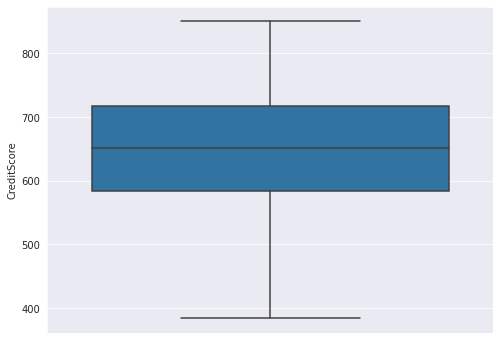

In [ ]:
# Plotando gráfico para verificar a existência de outliers.
sns.boxplot(y='CreditScore', data=df_eraseoutliersIQR)

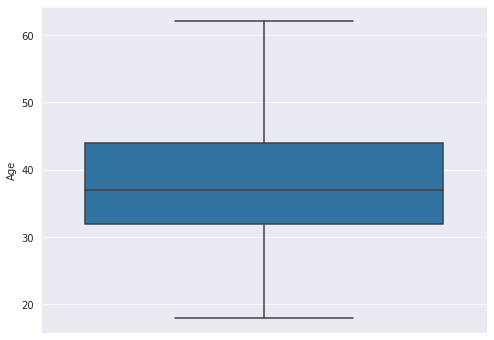

In [ ]:
sns.boxplot(y='Age', data=df_eraseoutliersIQR)

In [ ]:
# Estatísticas da base sem outliers.
df_eraseoutliersIQR.describe()

,CreditScore,Tenure,Age,Balance
count,8861.000000,9995.000000,9965.000000,10000.000000
mean,650.646541,5.011806,38.667436,76485.889288
std,96.642504,2.892279,9.751272,62397.405202
min,384.500000,0.000000,18.000000,0.000000
25%,584.000000,3.000000,32.000000,0.000000
50%,652.000000,5.000000,37.000000,97198.540000
75%,717.000000,7.000000,44.000000,127644.240000
max,850.000000,10.000000,62.000000,250898.090000


###Método 03 - Recorte de outliers usando Média e Desvio Padrão.

In [ ]:
# Importando a base.
df_eraseoutliers_MDP = df[['CreditScore','Tenure','Age','Balance','Exited']]

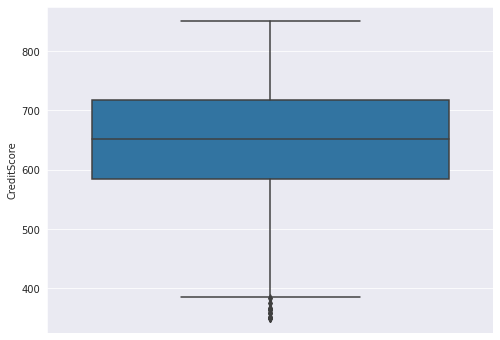

In [ ]:
# Plotando o atributo CreditScore.
sns.boxplot(y='CreditScore', data=df_eraseoutliers_MDP)

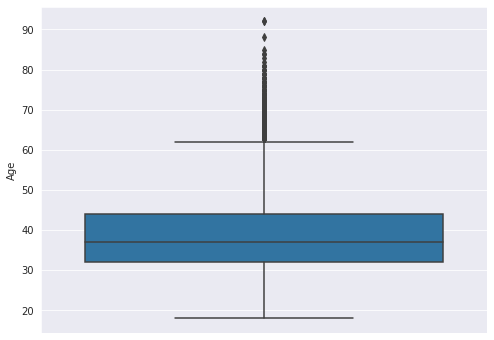

In [ ]:
# Plotando o atributo Age.
sns.boxplot(y='Age', data=df_eraseoutliers_MDP)

In [ ]:
# Determinando os limites superior e inferior basendo-se na média e no desvio padrão.
# Limites inferior e superior do atributo CreditScore.
lower_CreditScore_limit = df_eraseoutliers_MDP['CreditScore'].mean() - (3 * df_eraseoutliers_MDP['CreditScore'].std())
upper_CreditScore_limit = df_eraseoutliers_MDP['CreditScore'].mean() + (3 * df_eraseoutliers_MDP['CreditScore'].std())

# Determinando os limites inferior e superior do atributo Age.
lower_Age_limit = df_eraseoutliers_MDP['Age'].mean() - (3 * df_eraseoutliers_MDP['Age'].std())
upper_Age_limit = df_eraseoutliers_MDP['Age'].mean() + (3 * df_eraseoutliers_MDP['Age'].std())


print('Atributo CreditScore:\nLimite Inferior: ',lower_CreditScore_limit,'\nLimite Superior: ', upper_CreditScore_limit,'\n')
print('Atributo Age:\nLimite Inferior: ',lower_Age_limit,'\nLimite Superior: ', upper_Age_limit,'\n')

Atributo CreditScore:
Limite Inferior:  360.3991311761596 
Limite Superior:  940.8280440862262 

Atributo Age:
Limite Inferior:  7.448013637209208 
Limite Superior:  70.41008972455697 



In [ ]:
# Limitando os dados os limites inferior e superior.
df_eraseoutliers_MDP.loc[:,('CreditScore')] = np.where(df_eraseoutliers_MDP['CreditScore'] > upper_CreditScore_limit, upper_CreditScore_limit, np.where(df_eraseoutliers_MDP['CreditScore'] < lower_CreditScore_limit, lower_CreditScore_limit, df_eraseoutliers_MDP['CreditScore']))
df_eraseoutliers_MDP.loc[:,('Age')] = np.where(df_eraseoutliers_MDP['Age'] > upper_Age_limit, upper_Age_limit, np.where(df_eraseoutliers_MDP['Age'] < lower_Age_limit, lower_Age_limit, df_eraseoutliers_MDP['Age']))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


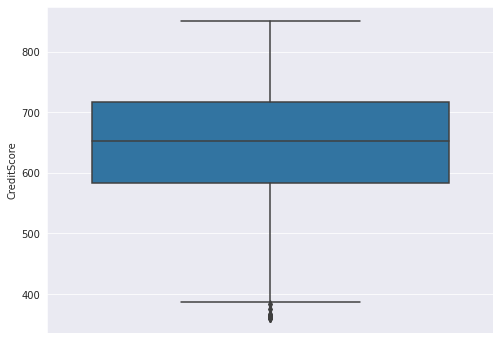

In [ ]:
# Plotando o gráfico para localizar outliers. Atributo CreditScore.
sns.boxplot(y='CreditScore', data=df_eraseoutliers_MDP)


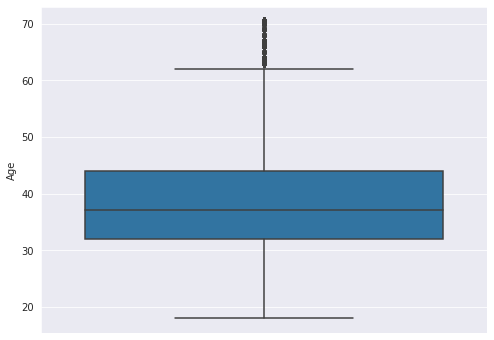

In [ ]:
# Atibuto Age.
sns.boxplot(y='Age', data=df_eraseoutliers_MDP)

In [ ]:
# Estatísticas da base utilizada no método 03.
df_eraseoutliers_MDP.describe()

,CreditScore,Tenure,Age,Balance,Exited
count,8861.000000,9995.000000,9965.000000,10000.000000,9778.000000
mean,650.619771,5.011806,38.870200,76485.889288,0.203314
std,96.719288,2.892279,10.292179,62397.405202,0.402484
min,360.399131,0.000000,18.000000,0.000000,0.000000
25%,584.000000,3.000000,32.000000,0.000000,0.000000
50%,652.000000,5.000000,37.000000,97198.540000,0.000000
75%,717.000000,7.000000,44.000000,127644.240000,0.000000
max,850.000000,10.000000,70.410090,250898.090000,1.000000
